In [13]:
import pandas as pd

from sklearn.model_selection import train_test_split

import datetime
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LayerNormalization
from keras.layers import PReLU
from keras.utils.vis_utils import plot_model

import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [14]:
x = pd.read_csv("../../../Datos/Procesados/x_values.csv", dtype = int)
y_cdm = pd.read_csv("../../../Datos/Procesados/y_dummies_cdm.csv", dtype = int)
y_grdt = pd.read_csv("../../../Datos/Procesados/y_dummies_grdtipo.csv", dtype = int)
y_grd = pd.read_csv("../../../Datos/Procesados/y_dummies_grd.csv", dtype = int)
y_sev = pd.read_csv("../../../Datos/Procesados/y_dummies_sev.csv", dtype = int)

# Lee los datos obtenidos por el script dataSetPrep.ipynb

In [15]:
str_y_cdm = "CDM"
str_y_grdt = "GRDT"
str_y_grd = "GRD"
str_y_sev = "SEV"

In [16]:
lst_y = [y_cdm, y_grdt, y_grd, y_sev]
lst_str_y = [str_y_cdm, str_y_grdt, str_y_grd, str_y_sev]

In [17]:
def training_data(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 0, stratify = y_train)

    return x_train, x_val, x_test, y_train, y_val, y_test

In [18]:
# pd.DataFrame(x_train).to_csv("../../../Datos/Procesados/Data_ANN/x_train.csv",index=False,sep=";")
# pd.DataFrame(y_train).to_csv("../../../Datos/Procesados/Data_ANN/y_train.csv",index=False,sep=";")
# pd.DataFrame(x_test).to_csv("../../../Datos/Procesados/Data_ANN/x_test.csv",index=False,sep=";")
# pd.DataFrame(y_test).to_csv("../../../Datos/Procesados/Data_ANN/y_test.csv",index=False,sep=";")
# pd.DataFrame(x_val).to_csv("../../../Datos/Procesados/Data_ANN/x_val.csv",index=False,sep=";")
# pd.DataFrame(y_val).to_csv("../../../Datos/Procesados/Data_ANN/y_val.csv",index=False,sep=";")

In [19]:
# x_train, x_test, y_train, y_test = train_test_split(x, lst_y[0], test_size = 0.2, random_state = 0, stratify = lst_y[0])
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 0, stratify = y_train)

In [20]:
# classifier = Sequential()
# l1 = 3000
# l2 = 3000
# l3 = 3000
# batch = 256
# epochs = 100

# classifier.add(LayerNormalization())

# classifier.add(Dense(units = l1, kernel_initializer = "random_uniform", activation = "sigmoid", input_dim = 68))

# classifier.add(Dropout(rate=0.5))

# classifier.add(Dense(units = l2, kernel_initializer = "random_uniform", activation = "relu"))

# classifier.add(Dense(units = l3, kernel_initializer = "random_uniform", activation = "PReLU"))

# classifier.add(Dropout(rate=0.5))

# classifier.add(Dense(units = int(len(y.transpose())), kernel_initializer = "uniform", activation = "softmax"))

# opt = keras.optimizers.Adam(learning_rate=0.00005)

# classifier.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "Dataset = " + str_y
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# classifier.build(input_shape = (None, 68))

# classifier.fit(x_train, y_train, batch_size = batch, epochs = epochs, verbose = 1, callbacks = [tensorboard_callback], validation_data = (x_val, y_val))

# # classifier.save('modelos/dataset{0}_{1}'.format(str_y, datetime.datetime.now().strftime("%Y_%m_%d_%H_%M")))

# y_prediction = classifier.predict(x_test)

# score = classifier.evaluate(x_test, y_test, verbose = 1, batch_size=128)

# print('Test loss: ', score[0],' Test accuracy:', score[1])

In [21]:
def ANN(x, y, str_y):
    print(f'Trabajando modelo "{str_y}."')

    x_train, x_val, x_test, y_train, y_val, y_test = training_data(x, y)

    classifier = Sequential()
    l1 = 3000
    l2 = 3000
    l3 = 3000
    batch = 256
    epochs = 100

    classifier.add(LayerNormalization())

    classifier.add(Dense(units = l1, kernel_initializer = "random_uniform", activation = "sigmoid", input_dim = 68))

    classifier.add(Dropout(rate=0.5))

    classifier.add(Dense(units = l2, kernel_initializer = "random_uniform", activation = "relu"))

    classifier.add(Dense(units = l3, kernel_initializer = "random_uniform"))
    classifier.add(PReLU())

    classifier.add(Dropout(rate=0.5))

    classifier.add(Dense(units = int(len(y.transpose())), kernel_initializer = "uniform", activation = "softmax"))

    opt = keras.optimizers.Adam(learning_rate=0.00005)

    classifier.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "Dataset = " + str_y
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    classifier.build(input_shape = (None, 68))

    history = classifier.fit(x_train, y_train, batch_size = batch, epochs = epochs, verbose = 1, callbacks = [tensorboard_callback], validation_data = (x_val, y_val))

    plot_model(classifier, to_file = f"classifier_plot_model_{str_y}.png",show_shapes = True, show_layer_names = True)

    # Trazar la pérdida en el entrenamiento y la validación
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Loss modelo {str_y}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Trazar la precisión en el entrenamiento y la validación
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Accuracy modelo {str_y}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.tight_layout()
    plt.show()

    path_ = f"../../../Visualización de datos/Curvas de aprendizaje"
    isExists = os.path.exists(path=path_)
    if not isExists:
        os.makedirs(path_)
    output_path = f"{path_}/Curvas aprendizaje modelo {str_y}.png"
    plt.savefig(output_path)

    # classifier.save('modelos/dataset{0}_{1}'.format(str_y, datetime.datetime.now().strftime("%Y_%m_%d_%H_%M")))
    #y_prediction = classifier.predict(x_test)
    #score = classifier.evaluate(x_test, y_test, verbose = 1, batch_size=128)
    #print('Test loss: ', score[0],' Test accuracy:', score[1])

Trabajando modelo "CDM."
Epoch 1/100
5355/5355 [==============================] - 39s 7ms/step - loss: 2.3945 - accuracy: 0.2841 - val_loss: 1.8594 - val_accuracy: 0.4277
Epoch 2/100
5355/5355 [==============================] - 38s 7ms/step - loss: 1.7798 - accuracy: 0.4471 - val_loss: 1.4097 - val_accuracy: 0.5491
Epoch 3/100
5355/5355 [==============================] - 38s 7ms/step - loss: 1.4660 - accuracy: 0.5290 - val_loss: 1.2096 - val_accuracy: 0.6072
Epoch 4/100
5355/5355 [==============================] - 38s 7ms/step - loss: 1.3077 - accuracy: 0.5737 - val_loss: 1.1021 - val_accuracy: 0.6402
Epoch 5/100
5355/5355 [==============================] - 37s 7ms/step - loss: 1.2143 - accuracy: 0.6021 - val_loss: 1.0300 - val_accuracy: 0.6626
Epoch 6/100
5355/5355 [==============================] - 38s 7ms/step - loss: 1.1454 - accuracy: 0.6231 - val_loss: 0.9758 - val_accuracy: 0.6835
Epoch 7/100
5355/5355 [==============================] - 37s 7ms/step - loss: 1.0950 - accuracy: 0.

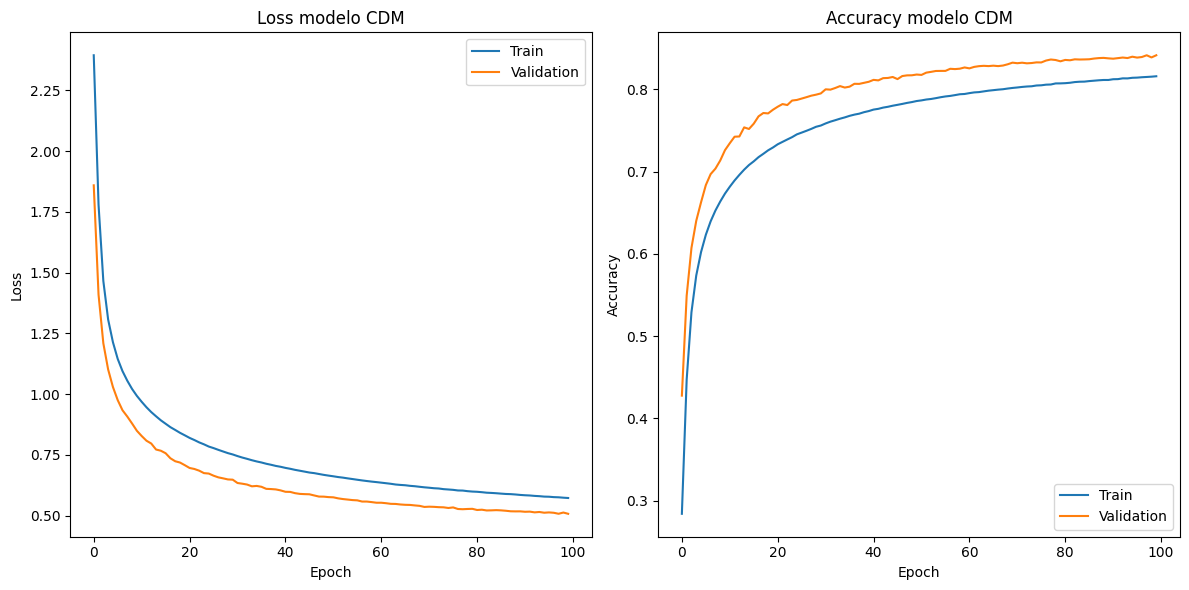

Trabajando modelo "GRDT."
Epoch 1/100
5355/5355 [==============================] - 42s 8ms/step - loss: 1.1110 - accuracy: 0.5515 - val_loss: 0.8882 - val_accuracy: 0.6696
Epoch 2/100
5355/5355 [==============================] - 41s 8ms/step - loss: 0.8643 - accuracy: 0.6695 - val_loss: 0.7099 - val_accuracy: 0.7340
Epoch 3/100
5355/5355 [==============================] - 40s 8ms/step - loss: 0.7539 - accuracy: 0.7142 - val_loss: 0.6479 - val_accuracy: 0.7558
Epoch 4/100
5355/5355 [==============================] - 39s 7ms/step - loss: 0.6971 - accuracy: 0.7372 - val_loss: 0.6087 - val_accuracy: 0.7687
Epoch 5/100
5355/5355 [==============================] - 38s 7ms/step - loss: 0.6589 - accuracy: 0.7516 - val_loss: 0.5817 - val_accuracy: 0.7807
Epoch 6/100
5355/5355 [==============================] - 38s 7ms/step - loss: 0.6302 - accuracy: 0.7630 - val_loss: 0.5595 - val_accuracy: 0.7899
Epoch 7/100
5355/5355 [==============================] - 39s 7ms/step - loss: 0.6077 - accuracy: 0

<Figure size 640x480 with 0 Axes>

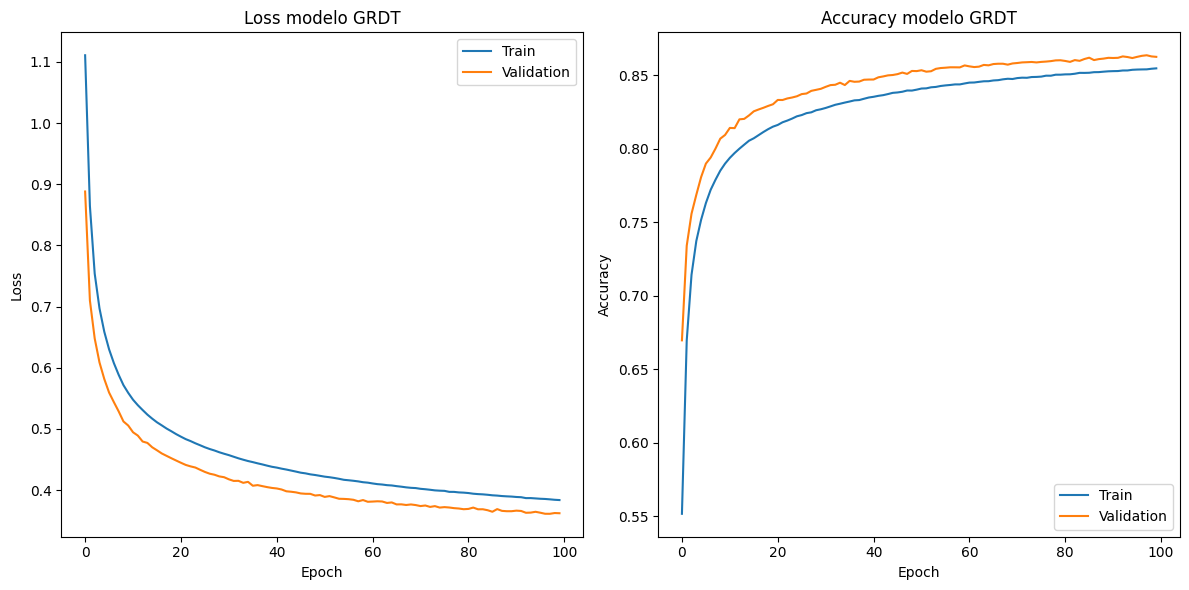

Trabajando modelo "GRD."
Epoch 1/100
5355/5355 [==============================] - 39s 7ms/step - loss: 2.8692 - accuracy: 0.1659 - val_loss: 2.6111 - val_accuracy: 0.2202
Epoch 2/100
5355/5355 [==============================] - 38s 7ms/step - loss: 2.5534 - accuracy: 0.2464 - val_loss: 2.3280 - val_accuracy: 0.3176
Epoch 3/100
5355/5355 [==============================] - 38s 7ms/step - loss: 2.3402 - accuracy: 0.3124 - val_loss: 2.1572 - val_accuracy: 0.3603
Epoch 4/100
5355/5355 [==============================] - 38s 7ms/step - loss: 2.2062 - accuracy: 0.3455 - val_loss: 2.0538 - val_accuracy: 0.3827
Epoch 5/100
5355/5355 [==============================] - 38s 7ms/step - loss: 2.1143 - accuracy: 0.3662 - val_loss: 1.9720 - val_accuracy: 0.3987
Epoch 6/100
5355/5355 [==============================] - 38s 7ms/step - loss: 2.0453 - accuracy: 0.3820 - val_loss: 1.9094 - val_accuracy: 0.4143
Epoch 7/100
5355/5355 [==============================] - 38s 7ms/step - loss: 1.9930 - accuracy: 0.

<Figure size 640x480 with 0 Axes>

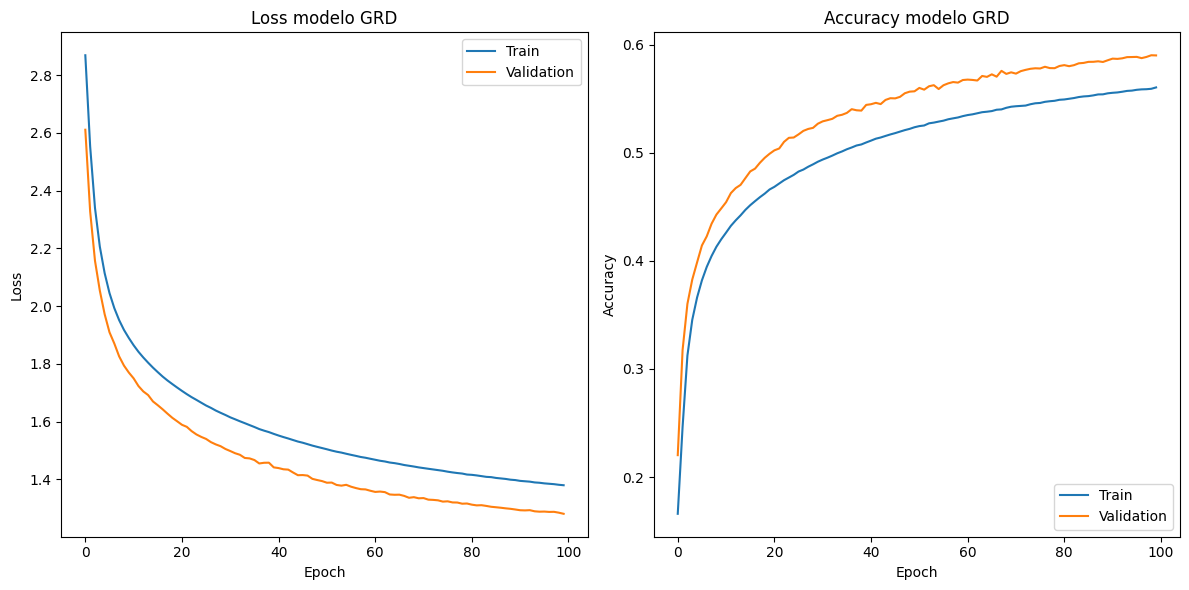

Trabajando modelo "SEV."
Epoch 1/100
5355/5355 [==============================] - 38s 7ms/step - loss: 0.9718 - accuracy: 0.5776 - val_loss: 0.8697 - val_accuracy: 0.6245
Epoch 2/100
5355/5355 [==============================] - 38s 7ms/step - loss: 0.8788 - accuracy: 0.6215 - val_loss: 0.8434 - val_accuracy: 0.6350
Epoch 3/100
5355/5355 [==============================] - 38s 7ms/step - loss: 0.8511 - accuracy: 0.6343 - val_loss: 0.8145 - val_accuracy: 0.6473
Epoch 4/100
5355/5355 [==============================] - 38s 7ms/step - loss: 0.8277 - accuracy: 0.6434 - val_loss: 0.7945 - val_accuracy: 0.6550
Epoch 5/100
5355/5355 [==============================] - 38s 7ms/step - loss: 0.8095 - accuracy: 0.6504 - val_loss: 0.7818 - val_accuracy: 0.6612
Epoch 6/100
5355/5355 [==============================] - 38s 7ms/step - loss: 0.7958 - accuracy: 0.6552 - val_loss: 0.7672 - val_accuracy: 0.6654
Epoch 7/100
5355/5355 [==============================] - 38s 7ms/step - loss: 0.7848 - accuracy: 0.

<Figure size 640x480 with 0 Axes>

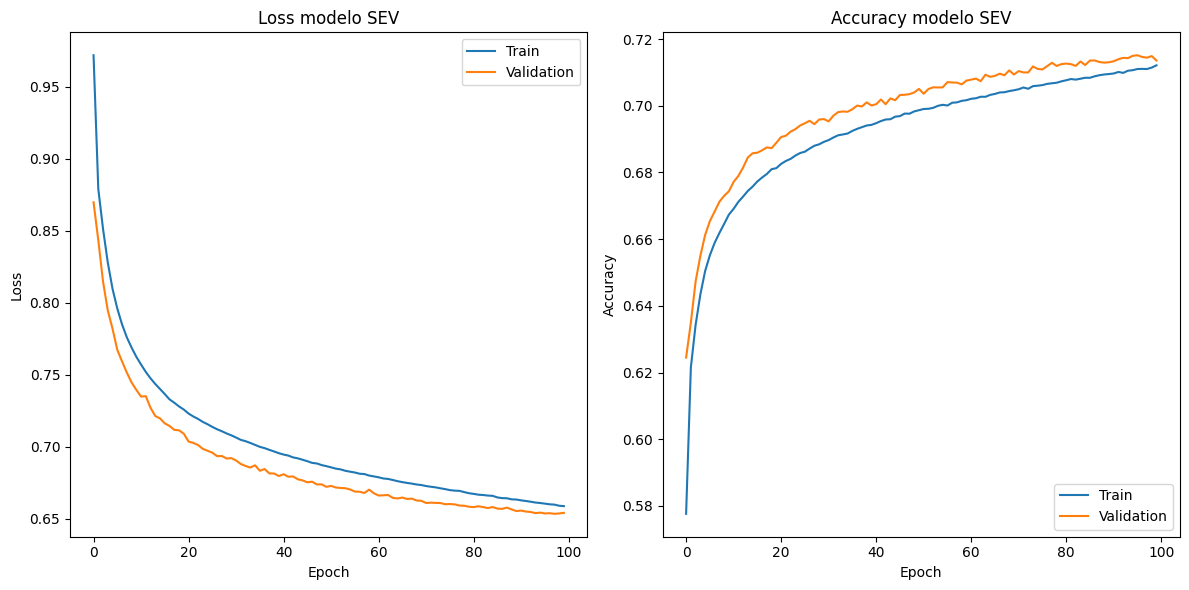

<Figure size 640x480 with 0 Axes>

In [22]:
for i in range(len(lst_y)):
    ANN(x, lst_y[i], lst_str_y[i])